## Hypothesis testing

*Know your boundaries*

Making decisions based on data is a fundamental part of data science. Below we will define the terms that characterize hypothesis testing. Notice how we are re-branding the terms we have already seen in the context of confidence intervals.


With a myriad applications ranging from A/B testing to determining the effectiveness of medical treatments, the fundamental structure remains the same:


- We have a **null hypothesis** that represents the status quo. This corresponds to a population distribution. i.e. whatever we are estimating is drawn from this distribution. 
    > For example, if we are measuring the click-through rate of a website, the null hypothesis could be that the the click through rate is poisson distributed with a mean of 0.05.

- We have a **significance threshold** $\alpha$ that determines the cutoff for how much of a chance we are willing to accept. This is our *quantile* for determining our confidence interval.
    > For example, if we set $\alpha = 0.05$, we are saying that we are willing to accept a 5% chance that the null hypothesis is true.

- We have an **alternative hypothesis** that simply states that the null hypothesis is not true. This corresponds to the area outside of the confidence interval. It is also called the **rejection region**.
    > For example, if we are measuring the click-through rate of a website, the alternative hypothesis could be that the click through rate is not poisson distributed with a mean of 0.05.



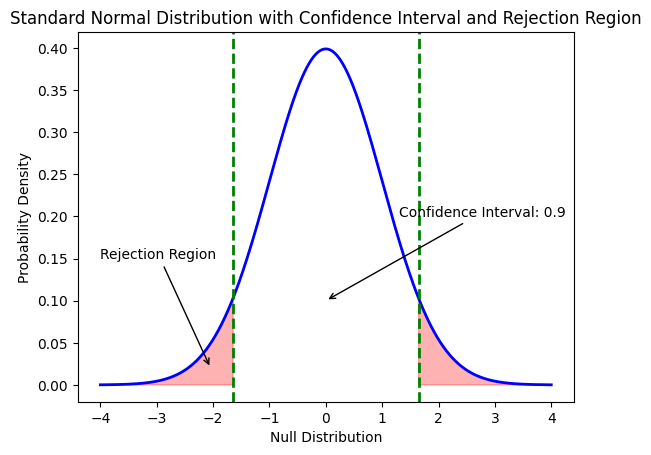

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
# Define the confidence level and significance threshold
confidence_level = 0.90
alpha = 1 - confidence_level

# Calculate the critical values for the confidence interval
z_critical = stats.norm.ppf(1 - alpha / 2)
# Calculate the rejection region boundaries
lower_bound = -z_critical
upper_bound = z_critical

# Generate x values for the plot
x = np.linspace(-4, 4, 1000)

# Generate y values for the standard normal distribution
y = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)

# Plot the standard normal distribution
plt.plot(x, y, 'b-', linewidth=2)

# Fill the rejection region in red
plt.fill_between(x, y, where=(x <= lower_bound) | (x >= upper_bound), color='red', alpha=0.3)

# Add vertical lines for the confidence interval boundaries
plt.axvline(x=lower_bound, color='green', linestyle='--', linewidth=2)
plt.axvline(x=upper_bound, color='green', linestyle='--', linewidth=2)

# Add annotations for the confidence interval and rejection region
plt.annotate(f'Confidence Interval: {confidence_level}', xy=(0, 0.1), xytext=(1.3, 0.2),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('Rejection Region', xy=(lower_bound-0.4, 0.02), xytext=(-4, 0.15),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

# Set plot labels and title
plt.xlabel('Null Distribution')
plt.ylabel('Probability Density')
plt.title('Standard Normal Distribution with Confidence Interval and Rejection Region')

# Show the plot
plt.show()

Finally, we have a **test statistic**.  This is the value we have to work with.

  >For example, if we are measuring the click-through rate of a website, the test statistic could be the click through rate. e.g. 4 out of 100 users clicked through = 0.04 click through rate.

Our goal is to determine whether our test statistic falls within the confidence interval or within the rejection region. If it falls within the confidence interval, we accept the null hypothesis. If it falls within the rejection region, we reject the null hypothesis.

### Example

Below is a visual representation of the example we just discussed. A function `plot_poisson_test()` is defined to plot the poisson distribution and the confidence interval. the number of observed clicks is displayed. Change the parameters `observed_clicks` and `alpha` to see how the confidence interval changes.

You can also change the null distribution parameter `null_ctrl` to see the decision changes.

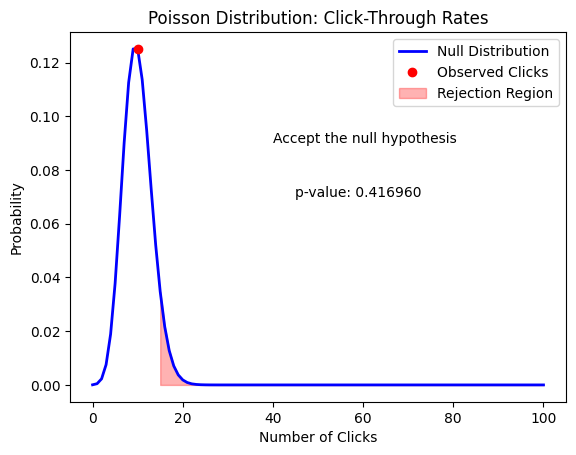

In [1]:
from utilities.HT_plot_utils import plot_poisson_test


# Set the observed click-through rate
observed_clicks = 10
total_users = 100
observed_ctr = observed_clicks / total_users

# Set the null hypothesis click-through rate
null_ctr = 0.10


# Set the significance level
alpha = 0.05

plot_poisson_test(observed_clicks, total_users, null_ctr, alpha)


### Assumptions

Notice that in setting our confidence interval, we are making the statement that we regard anything outside of it as *not drawn from the same distribution*. 

But the distributions we are working with are always positive, i.e. there are no impossible values, only very unlikely values.

This means that in setting our boundaries we are taking the risk that a value outside of our confidence interval is actually drawn from the same distribution. Alternatively, we are taking the risk that a value inside of our confidence interval is not drawn from the same distribution.

### Types of errors

There are two types of errors we can make in hypothesis testing:

- **Type I error**: We reject the null hypothesis when it is true. This is also called a *false positive*.
- **Type II error**: We accept the null hypothesis when it is false. This is also called a *false negative*.




### Hypothesis testing - A/B testing

Comparing two groups is a common task in data science. For example, a business analyst might want to know if a new marketing campaign has led to an increase in brand awareness. In all of these cases, we are interested in comparing two groups or populations. Alternatively, we might want to know if a new marketing campaign has led to an increase in brand awareness. In this particular case, we call this type of analysis **A/B testing**. But the logic remains the same.


#### The Null hypothesis

In order to make a decision, we need to have a hypothesis to test. The null hypothesis is the default position that there is no difference between two groups. If we are comparing the brand awareness of two marketing campaigns, the null hypothesis is that there is no difference between the two campaigns.

In comparing two groups, our null hypothesis still corresponds to a population distribution. The big difference difference is that this distribution is that of the difference between means of the two groups. i.e. the null hypothesis is that the difference between the means of the two groups is zero.

We have reduced the problem to the same problem we had before. We can use the same logic to determine our confidence interval and our rejection region: 

- our **null-hypothesis** is now the T-distribution.
- our **significance threshold** $\alpha$ is still the same.
- our **rejection region** is still the area outside of the confidence interval.
- our **test statistic** is now the difference between the means of the two groups, standardized by the standard error of the difference between the means of the two groups.


For independent samples with the same variance, the test statistic is given by, using the pooled variance:

$$
t = \frac{\bar{x}_1 - \bar{x}_2}{s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}
$$

where $s_p$ is the pooled standard deviation.




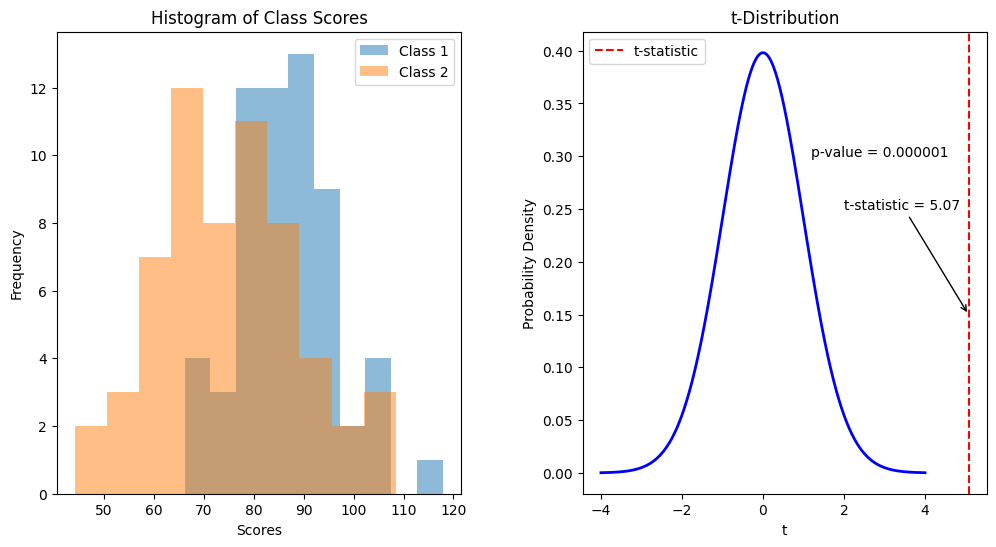

In [2]:
from utilities.HT_plot_utils import plot_two_sample_t_test


# generate the data
class_size = 60
class1_mean = 85
class1_std = 10
class2_mean = 75
class2_std = 15

# alpha level
alpha = 0.05

plot_two_sample_t_test(class1_mean, class1_std, class2_mean, class2_std, class_size, alpha)

## Summary

Hypothesis testing always conforms to the same structure: you have a null hypothesis, a significance threshold, an alternative hypothesis, and a test statistic. The test statistic is used to determine whether the test statistic falls within the confidence interval or within the rejection region. If it falls within the confidence interval, we accept the null hypothesis. If it falls within the rejection region, we reject the null hypothesis.

In this notebook, as in class, we covered situations where the null hypothesis is a normal distribution and where the null hypothesis is a T-distribution. In other cases, we can use the same logic to determine the confidence interval and the rejection region. The only difference is that we might have to use a different test statistic.

